Quantum Generator Circuit:
        ┌─────────┐      ░ ┌─┐   
   q_0: ┤ Ry(0.5) ├──■───░─┤M├───
        └┬───────┬┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─┤ Ry(1) ├─┤ X ├─░──╫─┤M├
         └───────┘ └───┘ ░  ║ └╥┘
meas: 2/════════════════════╩══╩═
                            0  1 
Quantum Generator Measurement Results: {'01': 15, '11': 37, '10': 218, '00': 730}


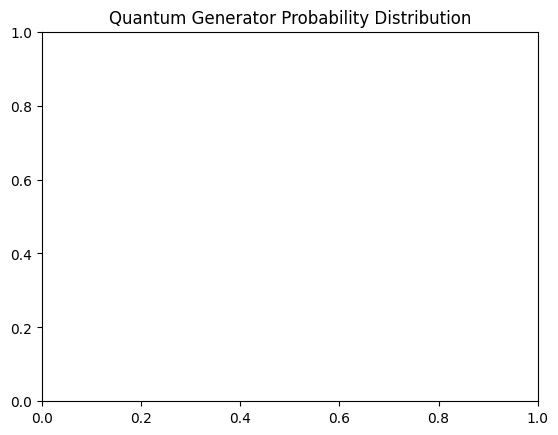

In [1]:
#-------------------------------------------------------------------------
# Quantum Generator 
# Chapter 9 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
#-------------------------------------------------------------------------

def quantum_generator(params):
    """ Define a quantum generator circuit """
    qc = QuantumCircuit(2)
    qc.ry(params[0], 0)
    qc.ry(params[1], 1)
    qc.cx(0, 1)
    qc.measure_all()
    return qc
#-------------------------------------------------------------------------

# Example parameters
params = [0.5, 1.0]
qc = quantum_generator(params)

# Display the quantum circuit
print("Quantum Generator Circuit:")
print(qc)
qc.draw('mpl')  # Graphically display the circuit

# Simulate the circuit
backend = Aer.get_backend('aer_simulator')
result  = execute(qc, backend, shots=1000).result()
counts  = result.get_counts()

# Print measurement results
print("Quantum Generator Measurement Results:", counts)

# Visualize the measurement results
plot_histogram(counts)
plt.title("Quantum Generator Probability Distribution")
plt.show()
